# Text Analysis for Topic Extraction Pipeline

In this module we focus on the most widespread and present media form: **text**.  
Text is every-where, in spoken language, books, websites, and so on.

It is no surprise that the success of big search engines is based on the appropriate analysis of text. 
Deriving ‘meaning’ from text is far from trivial, indeed it is a very difficult task.
Consider that meaning in text is created by distributions of words in specific language, following very specific and diverse grammar rules.
These arrangements are further nuanced by cultural codes, shorthands, metaphors, analogies, irony, specific references and so on.,

So, in this module, we are going to analyse this kind of media to extract topics in with the help of some statistical tools that can be seen as semi-automated.

## Topic Modelling

Imagine we have a large collection of documents that we want to understand without going through the arduous process of reading each and every one of them. Since we don’t have any prior information that tells us the content or subject of each document we have what we call in Machine Learning an **unsupervised problem** (more about this will be teached in a few weeks).

In this kind of setup, our goal is to find *latent* topics or themes in a collection of documents (corpus). Here, we refer to the topics as *latent* because they are not known to us. This is the reason why we need an algorithm to uncover these *latent* topics.
A family of techniques that allow us to do this is *Matrix Factorization* - and in this task we are going to use the **Non Negative Matrix Factorization** (NMF) technique.

### Doesn't the use of NMR implies that we are going to work with matrices? But we have text documents! How can I cast a document into a matrix?

Indeed, this will be something that we need to do - to "cast" documents (or, better saying, to model each document as a vector in a vector space).

In this cense, the high-level pipeline is going to be one such as described in fig. 1.

![Bag Of Words](./imgs/pipeline_high_level.jpeg)
Figure 1. Topic Pipeline (High Level)

In order to do createa a matrix representatioj, we are going to use a family of techniques known as **Bag of Words**.

## 1. A primer to the Bag Of Words Pipeline

The life cycle of statistical text processing can be seen as a four stages core, that are ilustrated in the figure below. 

The starting point of this process is the availability of a **corpus** - which is a collection of text documents.
For example, we can have a corpus on political debates, cooking recipes, the news broadcast by a given agency in a time period, and so on. 

Corpora (plural ofcorpus) thus often gather many documents on a given theme, and our goal is to find the different topics that make up that theme.

![Bag Of Words](./imgs/bag_of_words_pipeline.png)
Figure 1. Bag Of Words Pipeline

### 1.1 It all starts with a corpus

Any kind of text analysis always starts with a corpus. Maybe that corpus are Tweeks, or maybe that corpus are News.
And that corpus can be in many data formats - Web Pages that need to be scrapped, Text Files that need to be parsed, or some binary format that needs to be interpreted.

Let's make some examples with a text file that contains several news for a given time period, and let's parse the file!

Why do we need to parse the file? Well, if we want to understand the words of a given document in the file, we need to be able to access to different documents as we need - If I want to access to document 17, I must have a way to do.
Therefore, we need to create some kind of structure in memory to process these documents on the file!

### 1.2 Step 1 - Parse the Data

To parse the data into memory, we can start by getting every document in the file as a string, and store each document into a List.

In [2]:
document_list = []
# this is the dataset that we have been working with in the classes
# change the path of the file to where it is in your computer
with open('data/NYT_Corpus.txt', encoding = "UTF-8") as f:   
    
    for line in f:
        found_url = line[:9] == "URL: http" and line[-6:]==".html\n"
        if found_url:
            f.readline()
            document_list.append("")
        else:
            document_list[len(document_list)-1] += line

corpus = [doc for doc in document_list if len(doc) > 0]

print(f"The corpus contains {len(corpus)} documents")

The corpus contains 2461 documents


And now we have some data in memory with which we can start the pipeline described above!

## 2. Clean Documents

Now that we have our corpus, the first stage is concerned with cleaning the documents.The main idea here is to remove ‘noise’ in the form of text that has little to say about what a documentis speaking about.  

Statistical Text Analysis (STA) is concerned with the distributions of words. This is so in the sense that a document that contains many copies of the words ‘oven’, ‘cook’and ‘onion’ are likely to be about recipes/food.  
STA is not concerned with grammar rules of anykind.  For this reason, all connectors, punctuation marks and so on are not important to STA(and indeed they are eliminated as we will see later).  

Other methods for analysing text in thefield of Deep Natural Language processing are interested in (and use) grammar rules but we donnot study Deep NLP in this course.

### What is our goal in this step

Now we have a lot of words in the documents, as well as some other chars (e.g. punctuation). At the end of this Data Cleaning step, we need to have:

1. No punctuation chars
2. "normalized" words in two senses:
    - we and all the words in the same case (lower case)
    - in the sense that mapping, mapper and map are all words from the same family, and for this analysis we want these to be the same word instead of different words
3. Clean words that are not going to help us understand topics

### 2.1 Interpreting tokens in each document

So, one first step that we need to model is to understand what we are going to define as a valid tokens. For every document, as we are going thought it, we are going to need to filter valid tokens - only letting pass tokens that we have defined as valid.

In this exercise, let's define a **valid token** as any sequence of letters (being if upper or lowercase) as well as any sequence of numbers.

In order to do so, let's use a `regex` pattern which is `\w`, meaning that:
1. We want a sequence with at least of letter, being it upper or lower case
2. We want any sequence with at least one number
3. The catch on using this pattern is that we are going to allow the underscore char as well (`_`), but this allow our regex pattern to be a small and readable string :)

### 2.2 Putting the words in lower case

This step can be done either before the tokenization of after the tokenization, given that we are creating tokens out of both lower and upper case chars.
So, this step is here as the second not because it needs to be done here, but for us not to forget that this needs to be done - being it before, during or after the tokenization

### 2.3 Stemming the words

One of our goals is this step is to normalize words of the same family.

For example, if I have the words mapping, mapper and map, I want these different words that are the same semantic to be the same word.


A process that can help us do that is called Stem.

In [3]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer

tokenizer = RegexpTokenizer(r'\w+')
ps = PorterStemmer()

def mytokeniser(s):
    aux = [w.lower() for w in tokenizer.tokenize(s)]
    return list(map(ps.stem, aux))

tokenised_corpus = list(map(mytokeniser, corpus))


### Cleaning words that will not help us understand topics

So, given that Statistical Text Analysis (STA) is about data distribution, events that are constants (e.g. words that appear in every document - stop words for example) and events that are rare (e.g. word that appear in, for example, only in 3% in the documents of the corpus) are not going to be relevant for ou topic analysis, aren't they? 

Thinkg about this a little bit, and let this sink in.

Does it makes sense now? Awesome!

So, we now need a way to understand which words are which.

The way we are going to do this is:
1. Creating a vocabulary - a set of all the terms in the corpus
2. Score all the terms with a metric that help us understand the incident of a given term in a corpus.
    - This score will put the rare events in one extreme, and the constant events the another extreme (e.g. rare terms having the higher values, and constant terms having the lower values).
    - The above line yields that, for topic analysis, we want the words that are in between of those two
3. Based on these metrics, let's filter the terms and stay only with those relevant for topic analysis 

### 2.4 Creating a vocabulary

Given that this corpus has a lot of document, I am going to sample the corpus and will only use 100 documents

In [4]:
tokenized_corpus_sampled = tokenised_corpus
tokenized_corpus_sampled_idf_search = list(map(set, tokenized_corpus_sampled))

vocab = set()

for doc in tokenized_corpus_sampled:
    vocab = vocab.union(set(doc))  

print(f"My vocabolary size is {len(vocab)}")

My vocabolary size is 39539


### 2.5 Scoring extreme terms

The metric we are going to use to score the terms and therefore to get the extreme event is going to be the *IDF* metric.

#### The IDF Metric

Suppose  for  example  that  in  our  corpus  the  word  ‘rice’  appears  in  every  document.   
Suppose that you are the librarian keeping this corpus,  and somebody comes searching for a subset of documents in a given topic from your corpus.  
Imagine this library visitor tells you ‘rice’.  You go into the box to fetch all the documents that contain that word.  Clearly you will come backwith the entire box because every document in it contains that term.  
Was ‘rice’ a helpful term to support the library visitor’s needs?  Not really.  In fact not helpful at all. 

This is where Inverse Document Frequency or IDF comes in handy.  This number will represent the importance of a term in a given corpus, calculated using the following formula:

$IDF = log(\frac{N}{df_t})$

Where:
- N is the number of document in the corpus
- $df_t$ is the number of documents where the term $t$ is in

In [5]:
import math

idfvocab = {}

def idf(term, corpus):
    cnt =  sum([1 if term in doc else 0 for doc in corpus])
    return math.log10( len(corpus) / cnt )

for term in vocab:
    term_idf = idf(term, tokenized_corpus_sampled_idf_search)
    idfvocab[term] = term_idf




### 2.6 Let's filter out those extreme events

So, we now have our terms with a given metric scored. 
For us to filter the extreme events, there are several ways for doing so. 

We can think that we want to remove, for example, the upper 25% of the tokens and the lower 25% of the tokens.

We can also say that we want, at most only 200 tokens that are somewhere in the middle of the distribution to pass this filter.

The following example will be with the latter mindset.

In [6]:
import numpy as np

idfvocab_it = [(el[0],el[1]) for el in idfvocab.items()]

aux = np.array( idfvocab_it )
low = float( min( aux[:,1] ) )
high = float( max( aux[:,1] ) )

print(f"Min is {low} and max is {high}")

Min is 0.0005297351523672848 and max is 3.3911116137028023


In [9]:
def keep_terms( lower, upper, threshold, step, idf_vocabulary ):
    low = lower
    up = upper
    candidates = idf_vocabulary
    while len(candidates) > threshold:
        #print(f"current vocabolary size is {len(candidates)}")
        low = low + step
        up = up - step
        candidates = [  term for term in idf_vocabulary if term[1] >= low and term[1] <= up  ]
    return candidates


cnd = keep_terms(low, high, int(len(idfvocab_it)*0.2), 0.005, idfvocab_it)
len(cnd)

vc = np.array(cnd) #a matrix, with column 0 being terms and column 1 being idf
vc_terms = vc[:,0] 

By the end of this process, we now have our Bag of Words to continue this analysis! Notice that every document is going to be encoded with this bag of words in a vector space - we now have a unified (single) corpus representation!

## Construction of the TF-IDF Matrix

This step is the core of the STA life cycle. What  is  interesting  here  is  that,  while  starting with a corpus made of disjoint elements (a collection of documents),  we end up with a single corpus representation.  

This single representation unifies the information we have about the comprised documents.  Therefore we can use this single data structure to reason about the entire corpus!  
For this goal, working with an universal dictionary of terms is essential.

#### The TF Metric

Term Frequency or simply TF is a numeric quantity used to express the importance of a term inside a document.  
In its raw form, it is simply the count of times a term appears in a document.

However, here we compute TF as a proportion, by dividing this count by the total number of tokens  in  the  (stemmed)  document.   

#### The TF-IDF Metric

The final quantity that we will use to measure the importance of a term inside a document that belongs to a corpus os the standard TF.IDF measure which is simply:

$TF.IDF^d_t = TF^d_t * IDF_t$

Here $t$ refers as always to the term, and $d$ to a specific document. 

What is the effect of multiplying the original normalised TF by the IDF? The IDF acts as a modulator.  If the TF is high but the term is everywhere in the corpus, the IDF will be low, so the TF is brought down.  If a TF is medium, but the IDF is high then its importance is modulated upwards.

In [70]:
def normTFx(term,doc):
    return doc.count(term)/len(doc)

def tfidfmat(corpus, tl, idfvocab) :
    mat =[]
    for term in tl :
        idft = idfvocab[term]
        row = []
        for doc in corpus:
            tft = normTFx(term,doc)
            tf_idf_term_document = tft*idft
            row.append(tf_idf_term_document)
        mat.append(row)
    return mat    
            
    

tfidf_matrix = tfidfmat(tokenized_corpus_sampled, vc_terms, idfvocab) 
tfidf_matrix_np = np.array(tfidf_matrix)

In [10]:
# Here is an optimized implementation for te creation of the TF.IDF Matrix, that takes less than half the time than the implementation above


def normTFx_optimized(term, docMapCount, docLength):
    '''
        If you compare this implementation with the above one, you can notice that:
           - docMapCount is a dictionary where the key is the term, and the value is the count of the term in that document
           - the length of the document is received as a parameter
        This leads that, in this implementation, for each time we need to count a term in a document, we get that in constant time
    '''
    return (docMapCount.get(term) or 0)/docLength


from functools import reduce


def reduce_doc_map_count(reduced, el):
    if el in reduced:
        reduced[el] += 1
    else:
        reduced[el] = 1
    return reduced


'''
    the bellow code is doing the same as the following:
    for doc in tokenized_corpus_sampled:
        docMapCount = {}
        for term in doc:
            if term in docMapCount:
                docMapCount[term] += 1
            else:
                docMapCount[term] = 1
'''
tokenized_corpus_sampled_map_count = list(map( lambda doc: reduce( reduce_doc_map_count , doc, {}  ) , tokenized_corpus_sampled  ))

def tfidfmat(corpusMapCount, corpus, tl,idfvocab) :
    mat =[]
    for term in tl :
        idft = idfvocab[term]
        row = []
        for i in range(len(corpus)):
            tft = normTFx_optimized(term,corpusMapCount[i],len(corpus[i]))
            tf_idf_term_document = tft*idft
            row.append(tf_idf_term_document)
        mat.append(row)
    return mat    
            
    

tfidf_matrix = tfidfmat(tokenized_corpus_sampled_map_count, tokenized_corpus_sampled, vc_terms, idfvocab) 
tfidf_matrix_np = np.array(tfidf_matrix)

In [11]:
tfidf_matrix_np.shape

(7715, 2461)

In [13]:
print(f"The document with index 0 contains {len(tokenized_corpus_sampled[0])} words")
print(f"The term with index 0 is `{vc_terms[0]}`")

print(f"The importance of the term `{vc_terms[0]}` in the document with idx = 0 is {tfidf_matrix_np[0,0]}")

The document with index 0 contains 833 words
The term with index 0 is `manslaught`
The importance of the term `manslaught` in the document with idx = 0 is 0.0


Now  we  have  all  we  need  to  construct  our  single representation  of  the  corpus  as  a  matrix.   

This  matrix has  rows representing  the  terms  of the  universal  dictionary  for  the  corpus,  and  columns  representing  the  contained  documents. Therefore a given cell $S_{t,d}$ of the matrix will contain the corresponding $TF.IDF^d_t$.

## Matrix Decomposition

### Factorizing the Matrix with NMF


By applying the NMF, we are creating an "inner subspace" with `k` dimensions where the algorithm is going to optimize the values that minimize the representation error of the TF.IDF matrix.

Take the below image as a reference to visualize that:


![Bag Of Words](./imgs/tfidf_nmf_fatorization.png)

Figure 3. TF.IDF NMF topic space representation

$TF.IDF_{i,j} = \sum_{k=1}^{K} A_{i,k} * B_{k,j}$

In other words, we are trying to recreate each position of the  $TF.IDF$ matrix ($TF.IDF_{i,j}$) by finding K latent variables.
Moreover, since the method is applied to non-negative matrices, this imples an additive combination of basis parts to reconstruct the whole - meaning that (generally) factors that do not contribute will be weighted as zeros (instead of a 5 and a -5, if the factor doesn't contribute this method forces the values to be 0 and 0, because the matrices $A$ and $B$ will be positive)

In [14]:
from sklearn.decomposition import NMF
model = NMF(n_components=4, init='random', random_state=0)
W = model.fit_transform(tfidf_matrix_np) # loadings
H = model.components_ #scores

In [15]:
W.shape

(7715, 4)

In [16]:
H.shape

(4, 2461)

In this setup, the loading matrix is the `W`, where we "cross" terms and factors.

Let's analyse the top 7 terms for each of these factors.


In [17]:
def get_top_N_terms(matrix_slice, N):
    return matrix_slice.argsort()[-N:]

In [18]:
def get_terms_from_slice(loadings_matrix, idx, topN, bag_of_words, orientation="col"):
    '''
        the parameter `orientation` can either be "col" or "row", so we can process a loadings matrix being it transposed or not
    '''
    k = None
    if orientation == "col":
        k = loadings_matrix[:,idx]
    elif orientation == "row":
        k = loadings_matrix[idx,:]
    else:
        raise Exception("Orientation not recognized")
    k_top5terms_idx = get_top_N_terms(k,topN)
    return bag_of_words[k_top5terms_idx]
    

In [20]:
top_words = 10
for k in range(0,W.shape[1]):
    # Get terms for the k-th characteristic / topic
    print(f"The terms with more weight in the component {k} are: {get_terms_from_slice(W, k, top_words, vc_terms)}")

# here we are printing the top 7, but the this choise is arbitrary - we are going to analyze as much as we need to understand the topics

The terms with more weight in the component 0 are: ['nomine' 'sander' 'presidenti' 'hillari' 'obama' 'voter' 'donald' 'senat'
 'clinton' 'trump']
The terms with more weight in the component 1 are: ['marri' 'music' 'dr' 'student' 'groom' 'bride' 'y' 'bank' 'ali' 'graduat']
The terms with more weight in the component 2 are: ['prewar' 'eye' 'bedroom' 'bath' 'edg' 'captur' 'sharp' 'adventur'
 'stylish' 'cunningham']
The terms with more weight in the component 3 are: ['3622' '6397' 'correct' '800' '212' '698' '556' 'com' 'mail' 'nytim']


### Decomposition of eigenvectors (and values) using PCA

On the other hand, what the PCA does it quite different. The PCA is a technique that will find a squared matrix (let's call this matrix loadings) from the input matrix, where the number of columns of the input matrix defines the number of column and lines of the loadings' matrix.

The loading matrix is squared because what the PCA did was to obtained another base for the dataset, where each base represents a given percentage of data variability (explainability) - the first base is the component that explains more variability, followed by the second component, that is followed by the third component... you get the idea.




![Bag Of Words](./imgs/tfidf_pca_fatorization.png)

Figure 4. TF.IDF NMF topic space representation

PCA is used to get new components that can explain the variability of the data. The loadings matrix is one such it contains new dimensions - each representing a certain variability of the data - and in each new dimension you can also check the importance of the input variables.

So, let's suposed that we have a dataset with 5 columns. We apply the PCA, and the first two components can explain 99% of the data variability. Do we really need to use the other 3 components that are outputed by the pca?

Well, the PCA is therefore usefull to generate a low dimensional encoding of an high-dimensional data space - and to do this the PCA will explain the data variability on the data.

With this in mind, let's try to interpretate the loadings matrix outputed by the PCA, to compare that with the loadings matrix from NMF.

In [133]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(tfidf_matrix_np.transpose()) 
print(pca.explained_variance_ratio_)  


[0.0116727  0.01008413 0.00903723 0.00785882]


In [134]:
for k in range(0,pca.components_.shape[0]):
    # Get terms for the k-th characteristic / topic
    print(f"The terms with more weight in the component {k} are: {get_terms_from_slice(pca.components_, k, 7, vc_terms,'row')}")

# here we are printing the top 7, but the this choise is arbitrary - we are going to analyze as much as we need to understand the topics

The terms with more weight in the component 0 are: ['800' '212' '698' '556' 'com' 'mail' 'nytim']
The terms with more weight in the component 1 are: ['obama' 'hillari' 'senat' 'voter' 'donald' 'clinton' 'trump']
The terms with more weight in the component 2 are: ['champion' 'heavyweight' 'foreman' 'muhammad' 'louisvil' 'frazier' 'ali']
The terms with more weight in the component 3 are: ['trump' 'degre' 'marri' 'y' 'groom' 'bride' 'graduat']


## So is the NMF always preferable to PCA?

**The selection of the appropriate method depends upon the question being asked**

## Examples where the PCA shines

### Reducing dimentionality to understand structure of the data

Let's start with the following dataset:

In [100]:
import pandas as pd
from sklearn.decomposition import PCA

data_pXRF = pd.read_csv("./data/dados_pXRF_alldata.csv")
obj_label = data_pXRF["Obj"]
data_pXRF = data_pXRF[data_pXRF.columns[1:-2]]
data_pXRF.head()

,Si,Al,Mg,Ca,Na,K,Fe,Ti,S,Ba,...,As,Sb,Zr,P,Cl,Cr,Mn,Ni,Cu,Sr
0,78.564,0.0,1.963,5.450,12.732,0.220,0.026,0.0,0.283,0.007,...,0.083,0.151,0.002,0.023,0.055,0.002,0.108,0.0,0.002,0.003
1,77.869,0.0,1.371,5.475,14.040,0.220,0.026,0.0,0.250,0.006,...,0.085,0.152,0.002,0.022,0.056,0.001,0.106,0.0,0.001,0.003
2,78.375,0.0,1.688,5.512,12.949,0.240,0.031,0.0,0.408,0.006,...,0.090,0.158,0.002,0.026,0.073,0.001,0.110,0.0,0.002,0.003
3,79.266,0.0,1.861,5.565,11.782,0.284,0.028,0.0,0.416,0.005,...,0.090,0.160,0.002,0.029,0.066,0.001,0.111,0.0,0.002,0.003
4,79.067,0.0,2.008,5.541,12.008,0.233,0.030,0.0,0.342,0.009,...,0.088,0.158,0.002,0.027,0.045,0.001,0.110,0.0,0.002,0.003


This is a dataset about glass containers composition, where each line is a glass container and the columns represent a measurement regarding its component.

For example, in the first line we can see that the glass container composition is 78.6% Si, 0% Al, 2% Mg, and so on. 

The question that we want to awnser is: **can we find any composition groups in the glass containers?**

#### PCA to the rescue

Given the above explanation about PCA, one should be expecting that by using the PCA we can transform the dataset to a new base (a new vector space) that maybe will combine (linearly) the most important variables in the top2 or top3 principal components.

If such happens, we can explain the variability of the dataset with only those components, and maybe in this space we can see some kind of grouping!

Let's check!


In [101]:
pca_xprf = PCA(n_components=2).fit(data_pXRF.values)
pca_xprf_transformed = pca_xprf.transform(data_pXRF.values)

In [102]:
print(pca_xprf.explained_variance_ratio_)

[0.9144794  0.06936898]


Wow! Awesome! With only two principal components, almost 99% of the data variability is explained!

Just like that, we get rid of those 23 initial dimensions, and we are now working with only 2 variables!


Let's see if in this 2d space, we can form groups!

In [136]:
pca_xprf_transformed.shape

(74, 2)

In [113]:
pca_components_explainable = pd.DataFrame(data=pca_xprf.components_,
                                 index=["PC1","PC2"],
                                 columns = data_pXRF.columns)

data_pXRF_transformed = pd.DataFrame(data=pca_xprf_transformed,    # values
             index=obj_label,    # 1st column as index
              columns=["PC1","PC2"])

In [106]:
data_pXRF_transformed.head()

,PC1,PC2
Obj,,
1,-4.092015,-0.562348
2,-2.654772,-0.685942
3,-3.802708,-0.521244
4,-5.266906,-0.421200
5,-4.968433,-0.491339


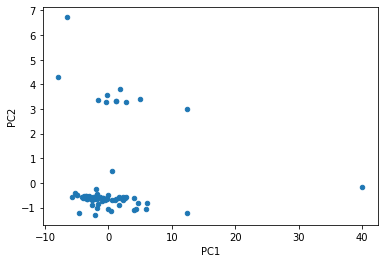

In [109]:
data_pXRF_transformed.plot(kind="scatter",x="PC1",y="PC2")

So - can we form groups? :)

Now, we have two components but we do not know what they are encoding. Let's look at the loadings matrix to interpretate these components!

In [138]:
# Obtain the first principal component and get the top greater 5 input variables
# Since variance can also be explained in a negative way, let's apply an abs before we sort the values
pca_components_explainable.iloc[0].apply(np.abs).sort_values()[-5:]

K     0.009969
Mg    0.016749
Ca    0.051953
Si    0.680157
Na    0.730925
Name: PC1, dtype: float64

So, the PC1 can be explained by, mainly, by the `Na` and `Si` variable.

In [139]:
# Obtain the second principal component and get the top greater 5 input variables
# Since variance can also be explained in a negative way, let's apply an abs before we sort the values
pca_components_explainable.iloc[1].apply(np.abs).sort_values()[-5:]

Ca    0.063759
Mg    0.141003
Na    0.340976
Si    0.344918
K     0.855655
Name: PC2, dtype: float64

Now, the PC2 can be explained by the `K`, `Si` and `Na`

### Another comparation between PCA and NMF - Faces characterization

In [23]:
from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF

logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')


# #############################################################################
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

2019-11-19 06:30:38,199 Downloading LFW metadata: https://ndownloader.figshare.com/files/5976012
2019-11-19 06:30:38,869 Downloading LFW metadata: https://ndownloader.figshare.com/files/5976009
2019-11-19 06:30:39,468 Downloading LFW metadata: https://ndownloader.figshare.com/files/5976006
2019-11-19 06:30:40,170 Downloading LFW data (~200MB): https://ndownloader.figshare.com/files/5976015


In [24]:
# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

In [33]:
# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

In [85]:
lfw_people.target.shape

(1288,)

In [45]:
print("Images properties:")
print("n_images: %d" % n_samples)
print(f"nmr of pixeis per row: {w}")
print(f"nmr of pixeis per column: {h}")

print("\n")

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Images properties:
n_images: 1288
nmr of pixeis per row: 37
nmr of pixeis per column: 50


Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [56]:
X.shape

(1288, 1850)

In [36]:
n_components = 150

In [57]:
print(f"Extracting the top {n_components} eigenfaces from {X.shape[0]} faces")
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X)
print("done in %0.3fs" % (time() - t0))
print(f"The accumulated explained variance in these {n_components} components is {np.sum(pca.explained_variance_ratio_)}") 

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_pca = pca.transform(X)
print("done in %0.3fs" % (time() - t0))

Extracting the top 150 eigenfaces from 1288 faces
done in 0.126s
The accumulated explained variance in these 150 components is 0.9534062743186951
Projecting the input data on the eigenfaces orthonormal basis
done in 0.014s


In [38]:
# #############################################################################
# Qualitative evaluation of the predictions using matplotlib

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)


In [55]:
pca.components_.shape

(150, 1850)

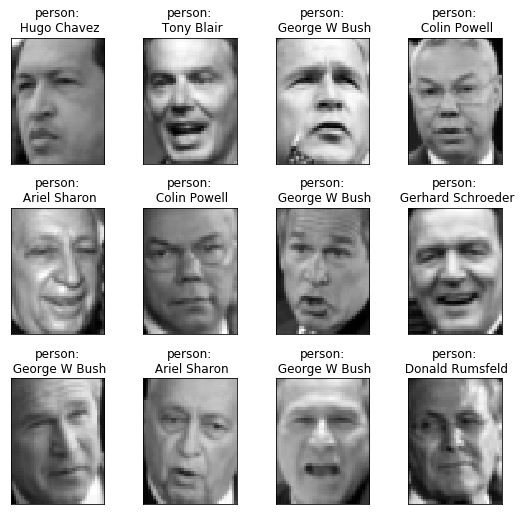

In [88]:
n_col = 4
n_row = 3
eigenface_titles = [f"person:\n {lfw_people.target_names[lfw_people.target[i]]}"  for i in range(n_row*n_col)]
plot_gallery(lfw_people.images, eigenface_titles, h, w)

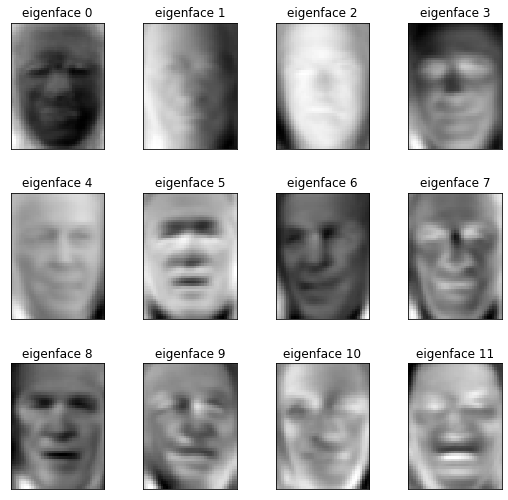

In [61]:
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

In [84]:
print(f"Extracting the top {n_components} characterization faces from {X.shape[0]} faces")
t0 = time()
nmf = NMF(n_components=n_components, init='random', random_state=0).fit(X)
H = nmf.components_
print("done in %0.3fs" % (time() - t0))

nmf_faces = H.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
NMF_W = nmf.fit_transform(X)
print("done in %0.3fs" % (time() - t0))

Extracting the top 150 characterization faces from 1288 faces
done in 18.920s
Projecting the input data on the eigenfaces orthonormal basis
done in 19.999s


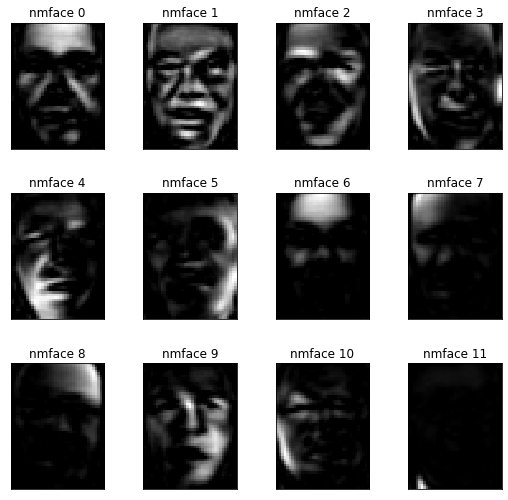

In [89]:
nmface_titles = ["nmface %d" % i for i in range(nmf_faces.shape[0])]
plot_gallery(nmf_faces, nmface_titles, h, w)